### Processing a demo fastq file using biopython 

### Read FASTQ file

In [31]:
from collections import defaultdict
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from Bio import SeqIO

In [32]:
recs = SeqIO.parse(open(
    '/Users/stevennguyen/Bioinformatics/demo.fastq', 'rt',encoding='utf-8'), 'fastq')
rec = next(recs)
print(rec)

ID: SRR960459.1
Name: SRR960459.1
Description: SRR960459.1 HWI-ST330:304:H045HADXX:1:1101:1162:2055 length=100
Number of features: 0
Per letter annotation for: phred_quality
Seq('NAGAACTTGGCGGCGAATGGGCTGACCGCTTCCTCGTGCTTTACGGTATCGCCG...GTT')


### Basic Statistics


In [43]:
records = (SeqIO.parse(open(
    '/Users/stevennguyen/Bioinformatics/demo.fastq', 'rt',encoding='utf-8'), 'fastq'))
count = 0
lengths_of_reads = []
for record in records:
    count += 1
    lengths_of_reads.append(len(record))

print("Total number of reads:", count)
print("Average length of reads:", np.mean(lengths_of_reads))
print("Maximum read length:",np.max(lengths_of_reads))
print("Minimum read length:",np.min(lengths_of_reads))

Total number of reads: 1250000
Average length of reads: 100.0
Maximum read length: 100
Minimum read length: 100


### Distribution of nucleotides for each read

In [15]:
from Bio.SeqUtils import gc_fraction

gc_data = ((gc_fraction(rec.seq), len(rec.seq)) for rec in SeqIO.parse(open('/Users/stevennguyen/Bioinformatics/demo.fastq', 'rt',encoding='utf-8'), 'fastq'))

total_gc,total_bases = map(sum,zip(*gc_data))

print(f'Total GC content: {total_gc/total_bases:.2%}')

Total GC content: 0.48%


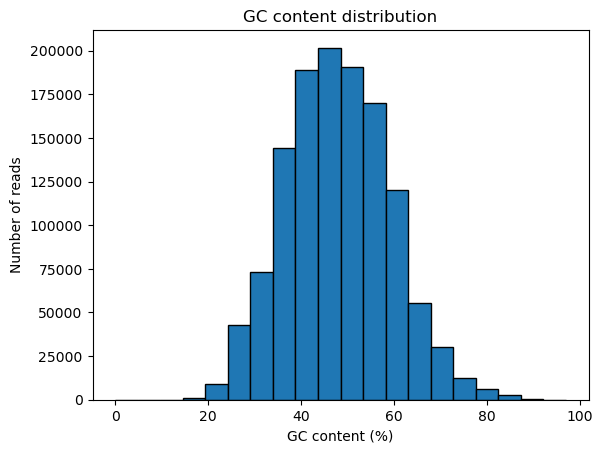

In [44]:
#average gc content per read 

gc_data = sorted (
    100 * gc_fraction(rec.seq) for rec in SeqIO.parse(
    open('/Users/stevennguyen/Bioinformatics/demo.fastq', 'rt',encoding='utf-8'), 'fastq')
)
plt.hist(gc_data, bins=20, edgecolor='black')
plt.xlabel('GC content (%)')
plt.ylabel('Number of reads')
plt.title('GC content distribution')
plt.show()


### Assessing quality of reads 


In [18]:
recs = SeqIO.parse(open('/Users/stevennguyen/Bioinformatics/demo.fastq', 'rt',encoding='utf-8'), 'fastq')
count_qual = defaultdict(int)
for rec in recs:
    for i, q in enumerate(rec.letter_annotations['phred_quality']):
        count_qual[q] += 1
total = sum(count_qual.values())
for qual,count in sorted(count_qual.items(),reverse=True):
    print('%d: %.2f %d' % (qual, 100. *count / total, count))

41: 15.00 18747654
40: 8.42 10523247
39: 8.99 11238087
38: 5.78 7229233
37: 8.34 10424680
36: 4.73 5907721
35: 12.34 15424007
34: 7.20 8995573
33: 4.03 5031863
32: 2.53 3163431
31: 3.64 4554799
30: 2.47 3085767
29: 1.65 2057438
28: 0.91 1133224
27: 1.15 1433761
26: 1.24 1544653
25: 0.94 1170931
24: 0.80 997686
23: 0.62 772347
22: 0.39 482610
21: 0.23 285721
20: 0.47 582242
19: 0.30 377849
18: 0.45 562633
17: 0.21 256562
16: 0.20 251271
15: 0.25 315871
14: 0.08 105355
13: 0.19 234136
12: 0.08 100494
11: 0.09 112137
10: 0.18 228732
9: 0.27 335172
8: 0.38 472091
7: 0.33 415165
6: 0.07 82512
5: 0.04 52654
2: 5.05 6310691


### Plot a histogram/boxplot to visualize 

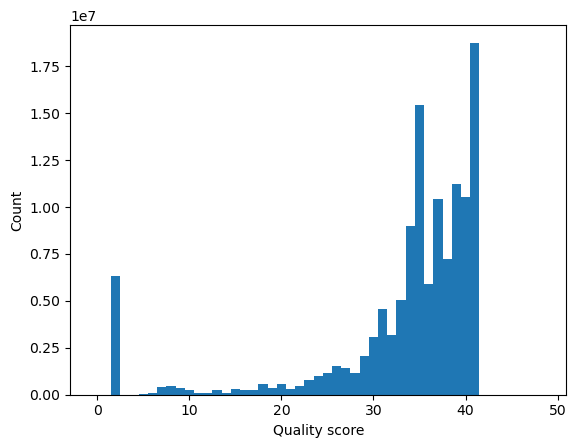

In [22]:
plt.hist(list(count_qual.keys()), weights=list(count_qual.values()), bins=range(0, 50), align='left')
plt.xlabel('Quality score')
plt.ylabel('Count')
plt.show()

Plot mean quality score per base across all reads 

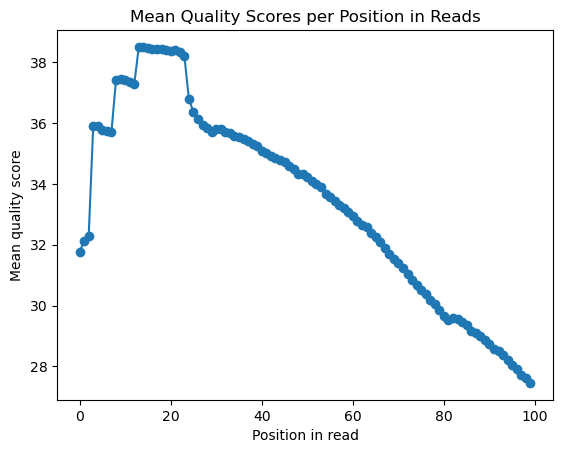

In [37]:
quality_scores = defaultdict(list)

for record in records:
    for i, score in enumerate(record.letter_annotations['phred_quality']):
        quality_scores[i].append(score)
        
    
#Calculate mean scores per position 

positions = sorted(quality_scores.keys())
mean_scores = [np.mean(quality_scores[pos]) for pos in positions]
plt.plot(positions,mean_scores, marker='o')
plt.xlabel('Position in read')
plt.ylabel('Mean quality score')
plt.title('Mean Quality Scores per Position in Reads')
plt.show()

### Filter for good quality reads only 

In [48]:
def quality_filter(records, min_qual= 20):
    for record in records: 
        avg_qual = np.mean(record.letter_annotations['phred_quality'])
        if avg_qual >= min_qual:
            yield record
        
        
filtered_reads = quality_filter(records)
